In [2]:
# TITLE

### Imports

In [1]:
from nnanno.sample import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import re

In [2]:
%load_ext autoreload
%autoreload 2

### Set plot style

In [3]:
plt.style.use('ggplot')

simple 

# View the amount of data per year

## Loading previous counts 


In [4]:
sampler = nnSampler()

In [5]:
df = sampler.population

## Plotting 

We can use the usual pandas plotting to get an overview of this data

<AxesSubplot:>

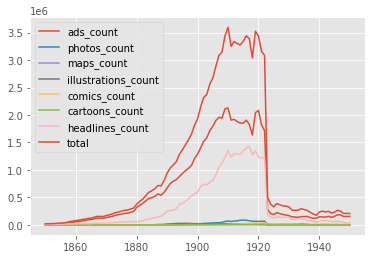

In [6]:
df.plot()

## ads only 

<AxesSubplot:>

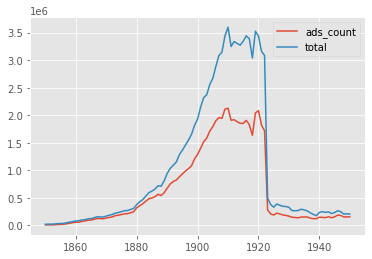

In [7]:
df[['ads_count','total']].plot()

## What does this tell us? 

This chart shows us
- the number of images predicted as adverts (and the total of all images) predicted by the Newspaper Navigator 

There are also a few things which this doesn't show:
- that adverts the number of adverts grew over time. This growth may be explained by more newspapers being published over time, better classifications of adverts by the newspaper navigator algorithm in later years,or a larger body of digitsed material overall in the LOC collection. 

# Creating a sample

In [8]:
sampler = nnSampler()

In [ ]:
sampler.create_sample(400, 'ads',end_year=1920,step=1, year_sample=False)

In [ ]:
!pip install -q pigeonXT-jupyter

In [50]:
images = get_image_files('data/ads')
images

(#1015) [Path('data/ads/mimtptc_bath_ver01_data_sn92063852_00271764509_1950081901_0626_004_6_96.jpg'),Path('data/ads/mimtptc_alpena_ver01_data_sn85033622_00296026462_1860061301_0254_000_6_96.jpg'),Path('data/ads/dlc_dry_ver01_data_sn83030213_00206530455_1854101801_0322_001_6_90.jpg'),Path('data/ads/ndhi_jemhadar_ver01_data_sn85042243_00383346113_1936042301_0952_002_6_95.jpg'),Path('data/ads/mimtptc_bath_ver01_data_sn92063852_00279551357_1936070401_0242_002_6_96.jpg'),Path('data/ads/pst_grange_ver01_data_sn84026005_00280776415_1870072001_0282_000_6_99.jpg'),Path('data/ads/uuml_collins_ver01_data_sn85058130_206534631_1896111301_0135_000_6_99.jpg'),Path('data/ads/curiv_janesville_ver01_data_sn84038806_00280768972_1876031501_0257_004_6_94.jpg'),Path('data/ads/mimtptc_jasper_ver01_data_sn93060356_00279552106_1934030801_0661_018_6_96.jpg'),Path('data/ads/hihouml_lilac_ver02_data_sn82015408_00237289687_1854030401_0820_002_6_92.jpg')...]

In [57]:
from pigeonXT import annotate
from IPython.display import display, Image

In [67]:
 annotations = annotate(
      images.items,
      options=['illustration', 'no_illustration'],
      display_fn=lambda filename: display(Image(filename)))

HTML(value='0 of 1015 Examples annotated, Current Position: 0 ')

Output()

In [99]:
anno_df = pd.DataFrame.from_dict(annotations, orient='index')

In [11]:
anno_df = pd.read_json('data/ads/anno_df.json')
anno_df

,0
data/ads/ak_gyrfalcon_ver01_data_sn86072239_00279525668_1922091901_0120_008_6_97.jpg,no_illustration
data/ads/arhi_gyarados_ver01_data_sn90050307_00414212918_1912053101_1080_005_6_94.jpg,illustration
data/ads/arhi_hypno_ver02_data_sn90050307_00414212955_1916050401_0602_002_6_98.jpg,no_illustration
data/ads/arhi_jolteon_ver01_data_sn90050306_00414213091_1912061401_0946_006_6_95.jpg,no_illustration
data/ads/arhi_kangaskhan_ver02_data_sn89051436_00414213054_1916111701_0896_002_6_99.jpg,illustration
...,...
data/ads/wvu_jones_ver02_data_sn84037844_00415664898_1906062901_0205_005_6_96.jpg,no_illustration
data/ads/wvu_jones_ver02_data_sn85059715_00295869999_1916052901_0792_001_6_99.jpg,no_illustration
data/ads/wvu_kuwait_ver02_data_sn85059716_00201293031_1858010801_0417_000_6_97.jpg,illustration
data/ads/wvu_neely_ver01_data_sn86092050_00340582147_1938021801_0461_001_6_99.jpg,illustration


In [12]:
anno_df = anno_df.reset_index()

In [14]:
anno_df['fname'] = anno_df.iloc[:,0]

In [15]:
anno_df['label'] = anno_df[0]

In [16]:
anno_df = anno_df[['label','fname']]

In [17]:
from fastai.vision.all import *

In [19]:
dls = ImageDataLoaders.from_df(anno_df, fn_col='fname', label_col=0,item_tfms=Resize(224, ResizeMethod.Squish))

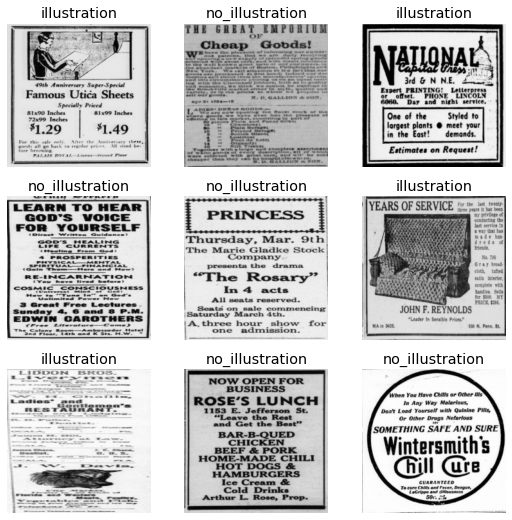

In [20]:
dls.show_batch()

In [127]:
learn = cnn_learner(dls, resnet34, metrics=[F1Score()])

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0030199517495930195)

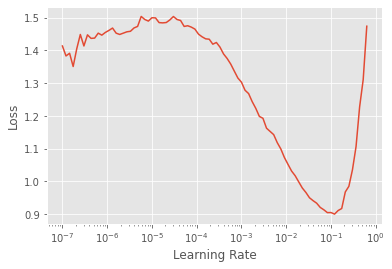

In [128]:
learn.lr_find()

In [ ]:
Path('ph/model/ad_model').mkdir(parents=True)

In [129]:
learn.path = Path('ph/model/ad_model/')

In [130]:
learn.fit_one_cycle(20, lr_max=1e-3, 
                    cbs=[SaveModelCallback(monitor='f1_score'), 
                         ReduceLROnPlateau(monitor='f1_score',patience=2),
                         MixUp()])

epoch,train_loss,valid_loss,f1_score,time
0,1.510553,0.853161,0.725424,00:08
1,1.257801,0.474300,0.864865,00:07
2,1.117998,0.392997,0.894915,00:07
3,0.979380,0.353770,0.902357,00:07
4,0.871770,0.329260,0.903010,00:07
5,0.794584,0.309017,0.928105,00:07
6,0.723227,0.283403,0.937705,00:07
7,0.672545,0.280505,0.930693,00:07
8,0.620496,0.281438,0.941176,00:07
9,0.590860,0.287483,0.937294,00:07


Better model found at epoch 0 with f1_score value: 0.7254237288135594.
Better model found at epoch 1 with f1_score value: 0.8648648648648649.
Better model found at epoch 2 with f1_score value: 0.8949152542372881.
Better model found at epoch 3 with f1_score value: 0.9023569023569025.
Better model found at epoch 4 with f1_score value: 0.903010033444816.
Better model found at epoch 5 with f1_score value: 0.9281045751633986.
Better model found at epoch 6 with f1_score value: 0.9377049180327869.
Better model found at epoch 8 with f1_score value: 0.9411764705882353.
Epoch 10: reducing lr to 6.627874179122669e-05
Epoch 12: reducing lr to 4.5642763694786556e-05
Better model found at epoch 14 with f1_score value: 0.9442622950819672.
Better model found at epoch 15 with f1_score value: 0.9508196721311475.
Better model found at epoch 16 with f1_score value: 0.9511400651465799.
Epoch 18: reducing lr to 1.2824843201924555e-06


In [131]:
learn.save('stage-1')

Path('ph/model/ad_model/models/stage-1.pth')

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=7.585775847473997e-07)

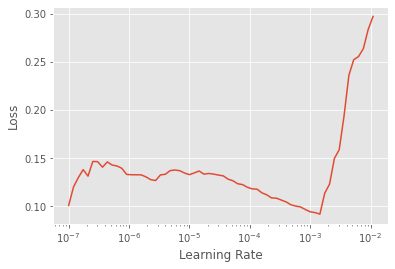

In [133]:
learn.unfreeze()
learn.lr_find()

In [134]:
learn.fit_one_cycle(5, lr_max=slice(1e-6,1e-4), 
                    cbs=[SaveModelCallback(monitor='f1_score'), 
                         ReduceLROnPlateau(monitor='f1_score',patience=1),
                         MixUp()])

epoch,train_loss,valid_loss,f1_score,time
0,0.380296,0.241072,0.944262,00:10
1,0.378132,0.237929,0.947712,00:10
2,0.382488,0.233719,0.944625,00:10
3,0.371450,0.228461,0.940789,00:10
4,0.364918,0.228477,0.944262,00:10


Better model found at epoch 0 with f1_score value: 0.9442622950819672.
Better model found at epoch 1 with f1_score value: 0.9477124183006537.
Epoch 2: reducing lr to 5.868282615718806e-06
Epoch 3: reducing lr to 1.921773193308592e-06
Epoch 4: reducing lr to 1.227962545205806e-08


In [135]:
interp = ClassificationInterpretation.from_learner(learn)

In [136]:
interp.print_classification_report()

                 precision    recall  f1-score   support

   illustration       0.95      0.75      0.84        56
no_illustration       0.91      0.99      0.95       147

       accuracy                           0.92       203
      macro avg       0.93      0.87      0.89       203
   weighted avg       0.92      0.92      0.92       203



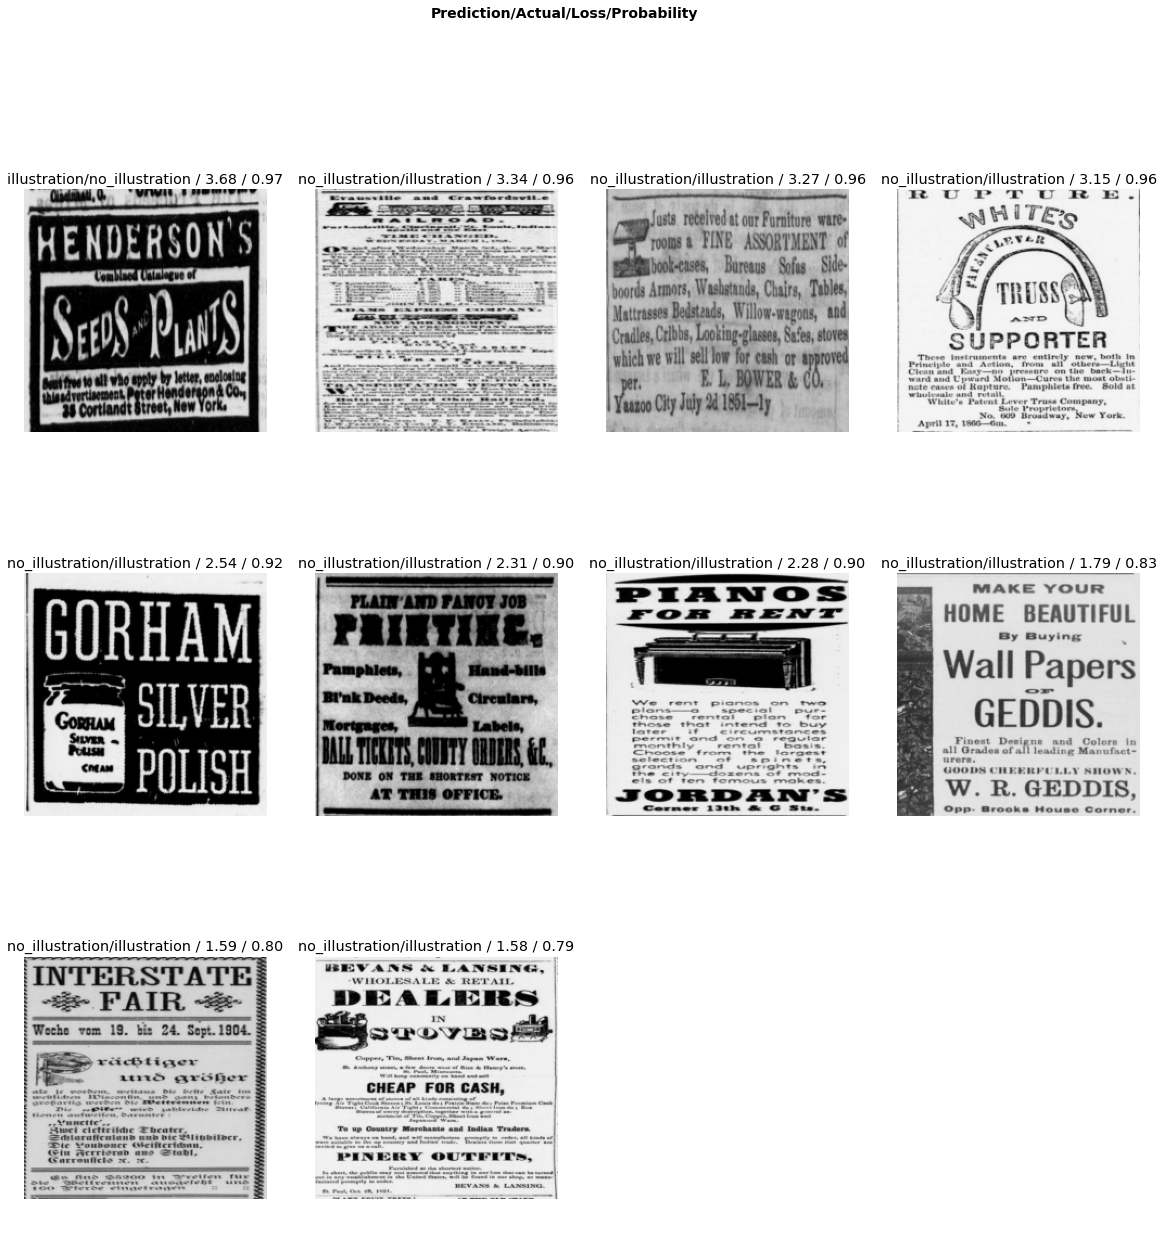

In [138]:
interp.plot_top_losses(10, figsize=(20,20))

In [139]:
learn.export()

In [10]:
from nnanno.inference import *

In [ ]:
pred_sample

In [43]:
!pip install geopy

  Using cached geopy-2.0.0-py3-none-any.whl (111 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)


In [1]:
import geopy

In [2]:
from geopy import geocoders  
gn = geocoders.GeoNames(username='davanstrien')

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_json('nbs/testinference/1851.json')

In [8]:
df['loc'] = df['place_of_publication'].apply(lambda x: gn.geocode(x))

In [9]:
df['loc'] = df['loc'].apply(lambda x: x[1] if x else np.nan)

In [10]:
df = df.dropna(subset=['loc'])

In [11]:
df

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url,iiif_url,pred_decoded,illustrations_prob,text-only_prob,loc
1,me_allagash_ver02/data/sn83009653/00279523969/...,1851-09-12,338,1,me_allagash_ver02,sn83009653,"[0.43287827900000003, 0.9170581409, 0.56252713...",0.959414,"[P.,, IKOXtSZT,, i'iu>«, i"", Drus>., Mrdiclnrs...","Paris, Me.","[Maine--Oxford--Paris, Maine--Oxford--South Pa...",Oxford Democrat. [volume],Millett & King,https://news-navigator.labs.loc.gov/data/me_al...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/me_a...,1,0.370716,0.629284,"(44.25979, -70.50062)"
2,scu_albinoskunk_ver02/data/sn93067976/00202193...,1851-12-02,268,1,scu_albinoskunk_ver02,sn93067976,"[0.4095858731, 0.5325208079, 0.6006268512, 0.9...",0.974889,"[e, VEGETABLE, DYSPEPSIA, BITTERS,, nit*, .tju...","Camden, South-Carolina",[South Carolina--Kershaw--Camden],Semi-weekly Camden journal. [volume],None,https://news-navigator.labs.loc.gov/data/scu_a...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/scu_...,0,0.584150,0.415850,"(36.34145, -76.16112)"
5,pst_carlisle_ver01/data/sn87052123/00296027753...,1851-01-14,713,1,pst_carlisle_ver01,sn87052123,"[0.7457384521, 0.3963590455, 0.9383410847, 0.4...",0.975853,"[Deutsche, Bibeln., H., A., Kanh,, Buchhändler...","[Reading, Pa.",[Pennsylvania--Berks--Reading],"Der liberale beobachter und Berks, Montgomery ...",Arnold Puwelle],https://news-navigator.labs.loc.gov/data/pst_c...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/pst_...,1,0.292562,0.707438,"(40.33565, -75.92687)"
6,me_allagash_ver02/data/sn83009653/00279523969/...,1851-02-21,222,1,me_allagash_ver02,sn83009653,"[0.8322156133, 0.0458711417, 0.963345483700000...",0.958493,"[tcALVAJHC, BELU, for, llir, Rnntnal, and, I'r...","Paris, Me.","[Maine--Oxford--Paris, Maine--Oxford--South Pa...",Oxford Democrat. [volume],Millett & King,https://news-navigator.labs.loc.gov/data/me_al...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/me_a...,0,0.616247,0.383753,"(44.25979, -70.50062)"
7,dlc_crunchy_ver01/data/sn83030213/00206530364/...,1851-12-25,370,1,dlc_crunchy_ver01,sn83030213,"[0.8351407676, 0.9215802177, 0.9974997002, 0.9...",0.949289,"[LC40I, 2aTotut?., IN, Pl'RSUa\NCE, ??f, ?a, o...",New-York [N.Y.],[New York--New York--New York],New-York daily tribune. [volume],Greeley & McElrath,https://news-navigator.labs.loc.gov/data/dlc_c...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/dlc_...,1,0.092381,0.907619,"(40.78788, -74.01431)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,dlc_crunchy_ver01/data/sn83030213/00206530352/...,1851-08-04,227,1,dlc_crunchy_ver01,sn83030213,"[0.1650147626, 0.7824400579, 0.326807605, 0.85...",0.934296,"[CO-PARTNERSHIP., j()TH-E.?CAMMANN, .v, WHITE,...",New-York [N.Y.],[New York--New York--New York],New-York daily tribune. [volume],Greeley & McElrath,https://news-navigator.labs.loc.gov/data/dlc_c...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/dlc_...,1,0.052333,0.947667,"(40.78788, -74.01431)"
96,dlc_crunchy_ver01/data/sn83030213/00206530352/...,1851-08-13,289,1,dlc_crunchy_ver01,sn83030213,"[0.0068233668, 0.0190576312, 0.1598646569, 0.1...",0.979247,"[TRIBUNE., THE, NE-V, YOR?, DAILY, TKIBt, Vi:,...",New-York [N.Y.],[New York--New York--New York],New-York daily tribune. [volume],Greeley & McElrath,https://news-navigator.labs.loc.gov/data/dlc_c...,https://chroniclingamerica.loc.gov/data/batche...,https://chroniclingamerica.loc.gov/iiif/2/dlc_...,1,0.032408,0.967592,"(40.78788, -74.01431)"
98,ncu_alligator_ver01/data/sn84045030/0029602262...,1851-04-16,300,1,ncu_alligator_ver01,sn84045030,"[0.5244378953000001, 0.7790330153, 0.6793624

In [15]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

Client Scheduler: tcp://127.0.0.1:57927 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


In [18]:
import dask
import dask.dataframe as dd

In [123]:
df = dd.read_json('nbs/testinference/1***.json',orient=None)

In [51]:
df = pd.read_json('nbs/testinference/1850.json')

In [124]:
df['pub_date']

Dask Series Structure:
npartitions=21
    object
       ...
     ...  
       ...
       ...
Name: pub_date, dtype: object
Dask Name: getitem, 63 tasks

In [125]:
df['pub_date'] = dd.to_datetime(df['pub_date'])

In [83]:
df['pred_decoded'] = df['pred_decoded'].astype('category')

<AxesSubplot:xlabel='pub_date'>

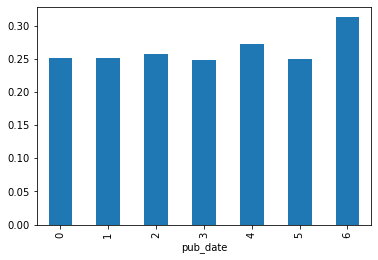

In [126]:
df.groupby(df.pub_date.dt.dayofweek).mean()['illustrations_prob'].compute().plot(kind='bar')

In [131]:
df.groupby(df.pub_date.dt.year).pred_decoded.value_counts().head(50)

pub_date  pred_decoded
1850      1.0               69
          0.0               19
1851      1.0               78
          0.0               23
1852      1.0               72
          0.0               16
1853      1.0              103
          0.0               12
1854      1.0              123
          0.0               27
1855      1.0              123
          0.0               35
1856      1.0              159
          0.0               40
1857      1.0              228
          0.0               73
1858      1.0              284
          0.0               97
1859      1.0              390
          0.0              105
1860      1.0              431
          0.0              131
1861      1.0              459
          0.0              130
1862      1.0              613
          0.0              108
1863      1.0              624
          0.0              168
1864      1.0              751
          0.0              184
1865      1.0              797
          0.0   